In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

num_classes = 10
input_shape = x_train.shape[1:]

inputs = Input(shape=input_shape)

x = inputs
for _ in range(4):  # 4 blocks
    for _ in range(3):  # 3 Conv2D → relu → BN
        x = Conv2D(64, (3, 3), padding='same', strides=1)(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


170498071/170498071 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0    

Epoch 1/10
782/782 [==============================] - 41s 30ms/step - loss: 1.6136 - accuracy: 0.4091 - val_loss: 1.2561 - val_accuracy: 0.5440
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 1.0945 - accuracy: 0.6095 - val_loss: 1.0816 - val_accuracy: 0.6181
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 0.8710 - accuracy: 0.6981 - val_loss: 0.9306 - val_accuracy: 0.6894
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.7536 - accuracy: 0.7410 - val_loss: 0.7442 - val_accuracy: 0.7391
Epoch 5/10
782/782 [==============================] - 22s 28ms/step - loss: 0.6661 - accuracy: 0.7722 - val_loss: 0.7126 - val_accuracy: 0.7643
Epoch 6/10
782/782 [==============================] - 23s 30ms/step - loss: 0.6062 - accuracy: 0.7945 - val_loss: 0.7627 - val_accuracy: 0.7471
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.5498 - accuracy: 0.8120 - val_loss: 0.6880 - val_accuracy:

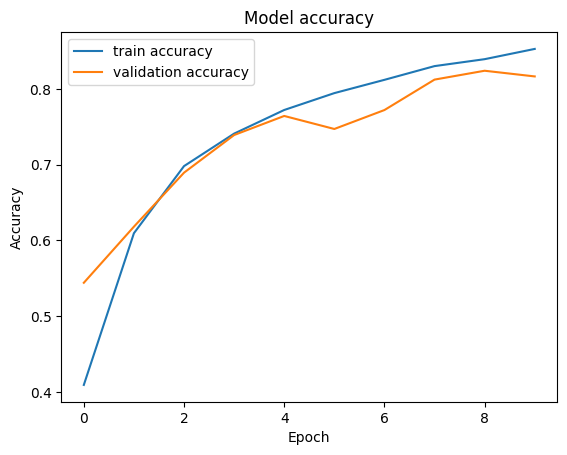

In [2]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")


plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()